In [52]:
print('hello tf')

hello tf


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
train_dir='dataset/train'
val_dir='dataset/val'
test_dir='dataset/test'

In [11]:
batch_size = 32
img_size = 256

train_gen=ImageDataGenerator(
      rescale=1./255,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest',
      shear_range=0.2).flow_from_directory(
    directory=train_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
validation_gen=ImageDataGenerator(
      rescale=1./255).flow_from_directory(
    directory=val_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
test_gen=ImageDataGenerator(
      rescale=1./255).flow_from_directory(
    directory=test_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 2633 images belonging to 3 classes.
Found 752 images belonging to 3 classes.
Found 378 images belonging to 3 classes.


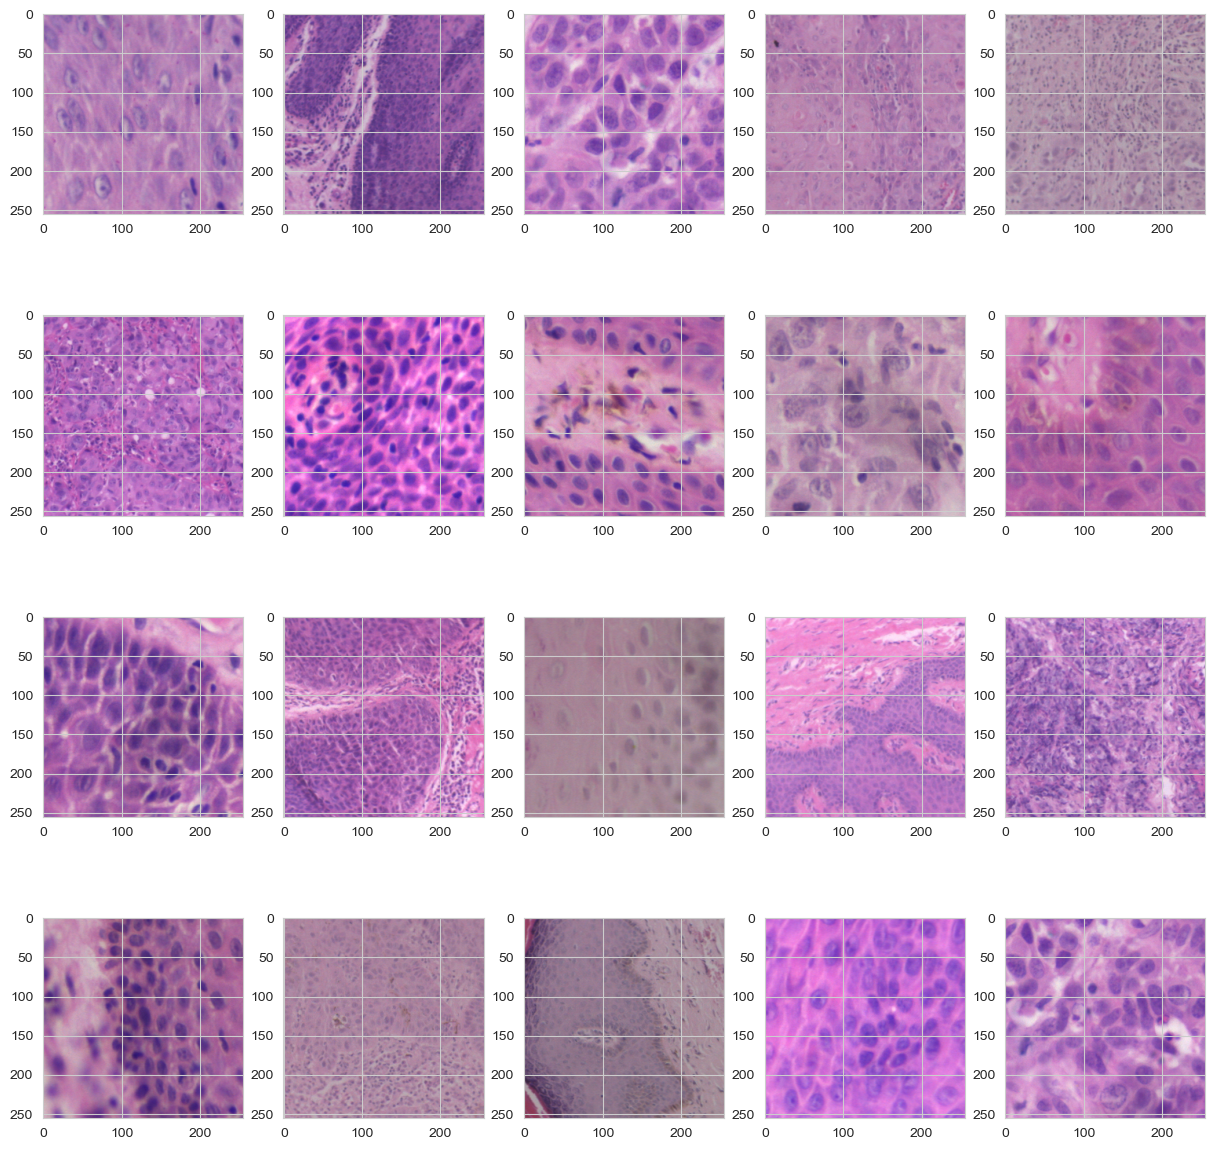

In [12]:
plt.figure(figsize=(15,15))
for batch_x,batch_y in train_gen:
    for i in range(0,20):
        plt.subplot(4,5,i+1)
        plt.imshow(batch_x[i])
    plt.show()
    break

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=4,
                               restore_best_weights=True,
                               mode='min',
                              )

In [16]:
history = model.fit(train_gen,
                    epochs=10,
                    validation_data=validation_gen,
                    callbacks=[early_stopping])

Epoch 1/10
83/83 [==============================] - 78s 934ms/step - loss: 10.8368 - accuracy: 0.4709 - val_loss: 72.6102 - val_accuracy: 0.1875
Epoch 2/10
83/83 [==============================] - 71s 854ms/step - loss: 4.0042 - accuracy: 0.4759 - val_loss: 9.4879 - val_accuracy: 0.2753
Epoch 3/10
83/83 [==============================] - 70s 837ms/step - loss: 2.0744 - accuracy: 0.5006 - val_loss: 3.0794 - val_accuracy: 0.4109
Epoch 4/10
83/83 [==============================] - 70s 843ms/step - loss: 1.3724 - accuracy: 0.4968 - val_loss: 2.3508 - val_accuracy: 0.2580
Epoch 5/10
83/83 [==============================] - 71s 854ms/step - loss: 1.0432 - accuracy: 0.5370 - val_loss: 1.4552 - val_accuracy: 0.5066
Epoch 6/10
83/83 [==============================] - 67s 806ms/step - loss: 1.0191 - accuracy: 0.5435 - val_loss: 1.1304 - val_accuracy: 0.5652
Epoch 7/10
83/83 [==============================] - 66s 795ms/step - loss: 0.9841 - accuracy: 0.5321 - val_loss: 0.9488 - val_accuracy: 0.55

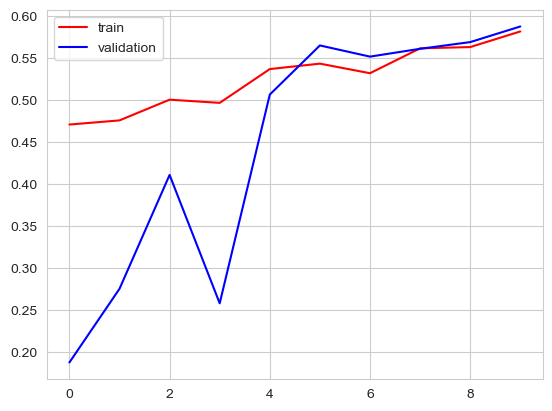

In [17]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

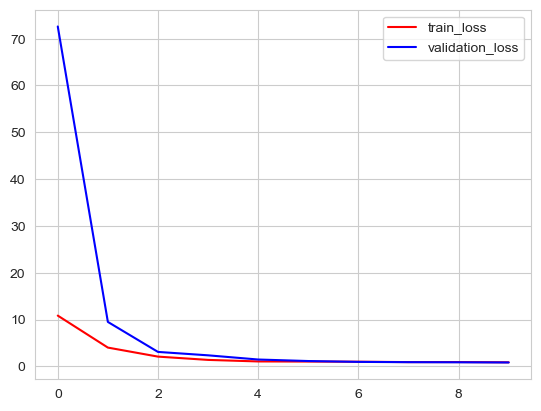

In [21]:
plt.plot(history.history['loss'], color='red', label='train_loss')
plt.plot(history.history['val_loss'], color='blue', label='validation_loss')
plt.legend()
plt.show()

In [22]:
model.evaluate(test_gen)

12/12 [==============================] - 3s 224ms/step - loss: 0.8904 - accuracy: 0.5847


[0.8903805613517761, 0.5846560597419739]

In [31]:
predictions = model.predict(test_gen, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

12/12 [==============================] - 3s 209ms/step


In [32]:
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [48]:
class_labels

['OSCC', 'With dysplasia', 'Without dysplasia']

In [49]:
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.4577


In [50]:
# Classification report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification Report:')
print(class_report)


Classification Report:
                   precision    recall  f1-score   support

             OSCC       0.34      0.28      0.31       113
   With dysplasia       0.51      0.72      0.60       193
Without dysplasia       0.15      0.03      0.05        72

         accuracy                           0.46       378
        macro avg       0.34      0.34      0.32       378
     weighted avg       0.39      0.46      0.41       378



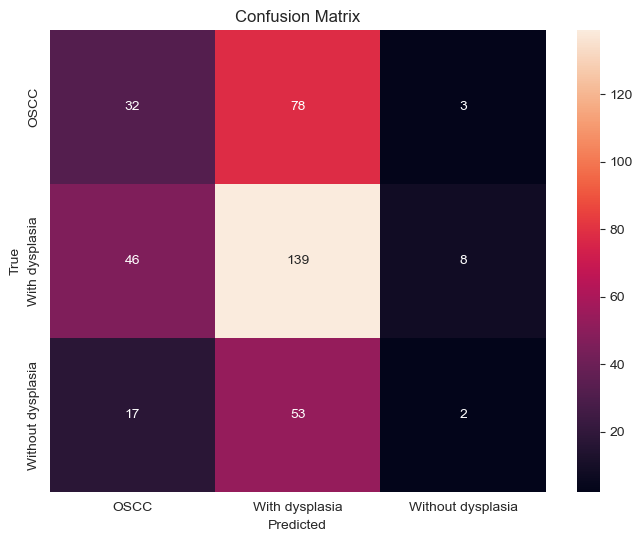

In [51]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()